<a href="https://colab.research.google.com/github/2303A51228/datamining/blob/main/Lab_Exam_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   feature_1   1000 non-null   float64
 1   feature_2   1000 non-null   float64
 2   feature_3   1000 non-null   float64
 3   feature_4   1000 non-null   float64
 4   feature_5   1000 non-null   float64
 5   feature_6   1000 non-null   float64
 6   feature_7   1000 non-null   float64
 7   feature_8   1000 non-null   float64
 8   feature_9   1000 non-null   float64
 9   feature_10  1000 non-null   float64
 10  target      1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 86.1 KB
None
         feature_1    feature_2    feature_3    feature_4    feature_5  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      0.055594    -0.004384    -0.072376    -0.935290     0.863523   
std       1.596527     1.528357     1.024196     1.141191     1.146616   
min     

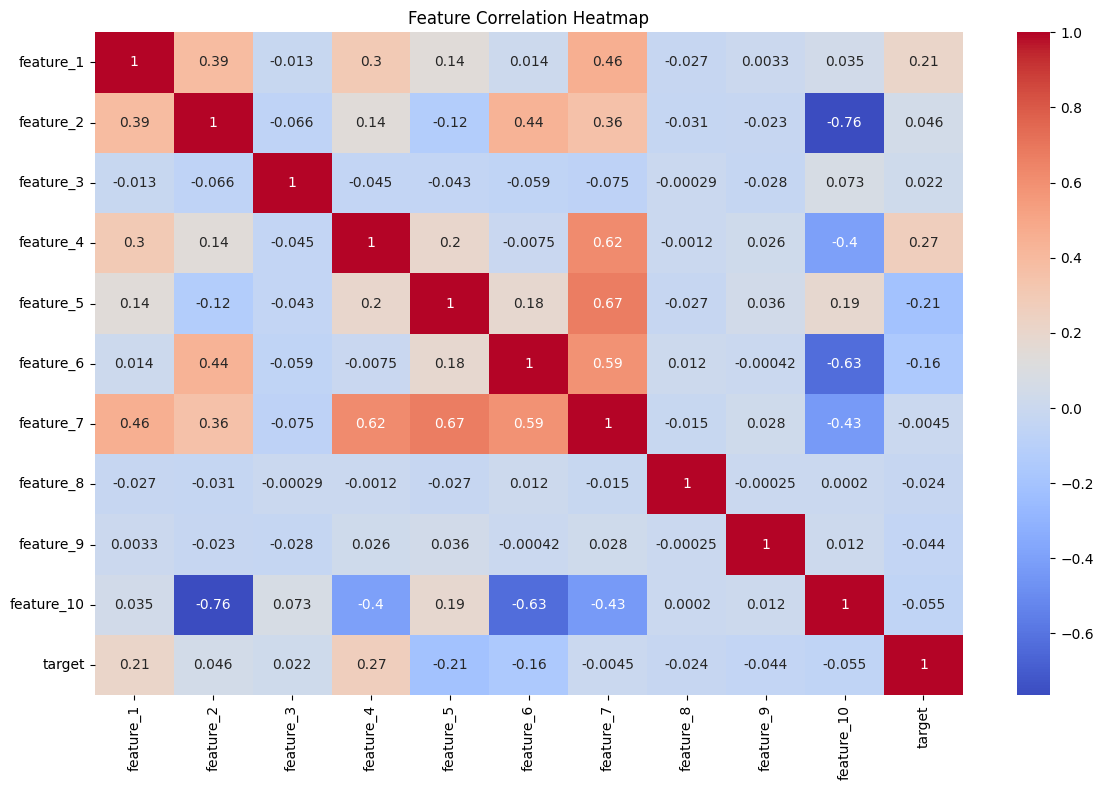

[[179   0]
 [  9  12]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       179
           1       1.00      0.57      0.73        21

    accuracy                           0.95       200
   macro avg       0.98      0.79      0.85       200
weighted avg       0.96      0.95      0.95       200



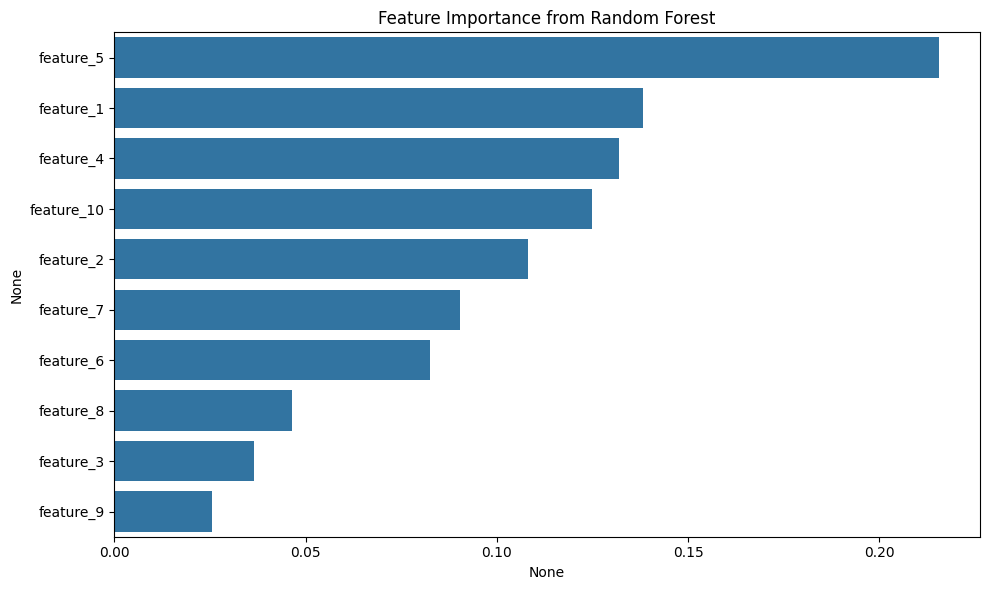

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

df = pd.read_csv("dataset_1.csv")

print(df.info())
print(df.describe())

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()

X = df.drop("target", axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

feature_importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.title("Feature Importance from Random Forest")
plt.tight_layout()
plt.show()